In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 10
l = 0
a = np.array([l,h])
b = np.array([h,l])
# y = -x + 100
calcy = lambda x1, result : (- result[0] / result[2]) - (result[1] * x1 / result[2])
isabove = lambda p, a,b: np.cross(p-a, b-a) < 0

def gen_data(plot_size):
  s = plot_size
  p = np.random.rand(s,2) * h
  resy = [1 if isabove(i, a, b) else -1 for i in p]
  return p, resy

def get_base_graph(p, resy):
  f1, ax = plt.subplots(1)
  ax.set_xlim(xmin=0,xmax=h)
  ax.set_ylim(ymin=0,ymax=h)

  ax.plot([a[0],a[1]],[b[0],b[1]], marker="o", color="k")
  ax.scatter(p[:,0],p[:,1], c=resy, cmap="bwr")
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')

  return f1, ax

def run_pla(p, resy):
  start = np.array([0.0,0.0,0.0])
  times = 0

  check = False
  while (not check):
    check = True
    for i in range(len(resy)):
      x = np.array([1, p[i][0], p[i][1]])
      if np.dot(start, x) * resy[i] <= 0:
        check = False
        start += resy[i] * x
        times += 1

  return start, times

def apply_result(plot_size, p=False, resy=False):
  if p is False and resy is False:
    p, resy = gen_data(plot_size)
  f1, ax = get_base_graph(p, resy)
  result, times = run_pla(p, resy)
  ax.plot([l, h],[calcy(l, result), calcy(h, result)], color="r")
  ax.set_title('Updated {} times, with {} points'.format(times, len(resy)))
  
  return f1, ax

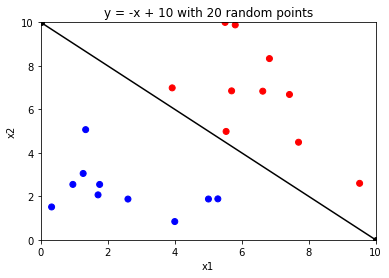

In [ ]:
p, resy = gen_data(20)
f1, ax1 = get_base_graph(p, resy)
ax1.set_title("y = -x + 10 with 20 random points")
f1.show()

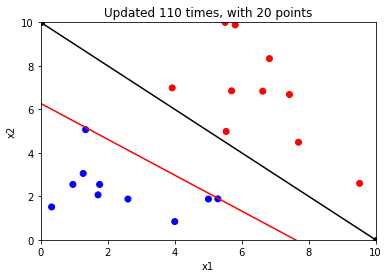

In [ ]:
f2, ax2 = apply_result(20, p=p, resy=resy)
f2.show()

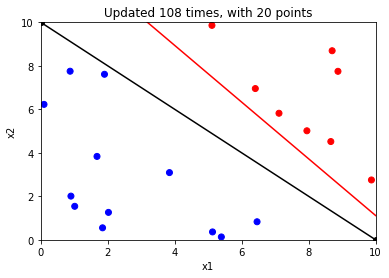

In [87]:
f5, ax5 = apply_result(20)
f5.show()

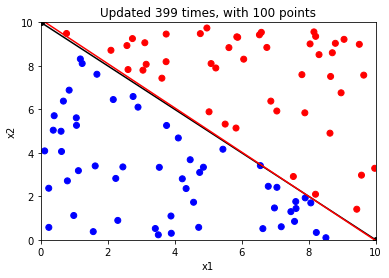

In [ ]:
f3, ax3 = apply_result(100)
f3.show()

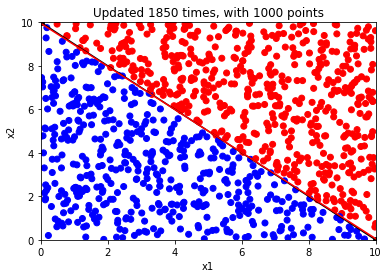

In [ ]:
f4, ax4 = apply_result(1000)
f4.show()